<a href="https://colab.research.google.com/github/Kwagalakwe-Grace/Computer-Vision-Project/blob/main/Machine_learning_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2 
 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# defining global variable path 
image_path = "/content/drive/MyDrive/cropped Images/crp" 
 
'''function to load folder into arrays and  
then it returns that same array''' 
def loadImages(path): 
    # Put files into lists and return them as one list of size 4 
    image_files = sorted([os.path.join(path, file) 
         for file in os.listdir(path + "") if      file.endswith('.jpg')]) 
  
    return image_files 

In [ ]:
images = loadImages(image_path)

print(images)

['/content/drive/MyDrive/cropped Images/crp/banaan26.jpg', '/content/drive/MyDrive/cropped Images/crp/banana1.jpg', '/content/drive/MyDrive/cropped Images/crp/banana10.jpg', '/content/drive/MyDrive/cropped Images/crp/banana101.jpg', '/content/drive/MyDrive/cropped Images/crp/banana102.jpg', '/content/drive/MyDrive/cropped Images/crp/banana103.jpg', '/content/drive/MyDrive/cropped Images/crp/banana104.jpg', '/content/drive/MyDrive/cropped Images/crp/banana105.jpg', '/content/drive/MyDrive/cropped Images/crp/banana106.jpg', '/content/drive/MyDrive/cropped Images/crp/banana107.jpg', '/content/drive/MyDrive/cropped Images/crp/banana108 (1).jpg', '/content/drive/MyDrive/cropped Images/crp/banana108 (2).jpg', '/content/drive/MyDrive/cropped Images/crp/banana108.jpg', '/content/drive/MyDrive/cropped Images/crp/banana109 (1).jpg', '/content/drive/MyDrive/cropped Images/crp/banana109 (2).jpg', '/content/drive/MyDrive/cropped Images/crp/banana109.jpg', '/content/drive/MyDrive/cropped Images/crp/

In [ ]:

# Preprocessing 
def processing(data): 
    # loading image 
    # Getting 3 images to work with  
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:4]] 
    print('Original size',img[0].shape) 
    # -------------------------------- 
    # setting dim of the resize 
    height = 220 
    width = 220 
    dim = (width, height) 
    res_img = [] 
    for i in range(len(img)): 
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
        res_img.append(res) 
 
    # Checcking the size 
    print("RESIZED", res_img[1].shape) 

    # ---------------------------------- 
    # Remove noise 
    # Gaussian 
    no_noise = [] 
    for i in range(len(res_img)): 
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0) 
        no_noise.append(blur) 
    

In [ ]:
data = loadImages(image_path)

In [ ]:
processing(data)

Original size (722, 1113, 3)
RESIZED (220, 220, 3)


Pixel values as features


In [ ]:
#pixel values

img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data ]
 # setting dim of the resize 
height = 220 
width = 220 
dim = (width, height) 
res_img = [] 
for i in range(len(img)): 
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
    #gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
    pv = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) 
    res_img.append(pv) 



In [ ]:
#edges
from skimage.filters import sobel

img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data ]
 # setting dim of the resize 
height = 220 
width = 220 
dim = (width, height) 
res_img = [] 
for i in range(len(img)): 
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
    sobel_img = sobel(res) 
    res_img.append(sobel_img)

In [ ]:
all_features = []
for i in range(len(res_img)):
    #print(res_img[i].shape)
    features = np.reshape(res_img[i], (145200))
    all_features.append(features) 
    print((features))
    

[0.03091994 0.06808419 0.03783174 ... 0.01358471 0.03849002 0.02490531]
[0.01235174 0.03205541 0.02119401 ... 0.01584883 0.0362259  0.02037707]
[0.40259664 0.3962518  0.39351643 ... 0.08158047 0.06521067 0.03991688]
[0.36359466 0.36354002 0.36336725 ... 0.1178987  0.08913305 0.0755305 ]
[0.01825391 0.05664823 0.03855655 ... 0.21445294 0.15467913 0.06478753]
[0.01936119 0.06924558 0.05074733 ... 0.13402688 0.11236937 0.06262946]
[0.01687858 0.043542   0.04816306 ... 0.10259786 0.08573201 0.07441084]
[0.04732614 0.03138372 0.06472615 ... 0.05335336 0.07470305 0.03223264]
[0.02683721 0.03977819 0.0400391  ... 0.04986847 0.09059658 0.04082483]
[0.02363809 0.05548246 0.03300492 ... 0.15248349 0.09063934 0.05498069]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09352345]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09352345]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09352345]
[0.34128759 0.35574805 0.36208417 ... 0.01584883 0.0362259  0.02

In [ ]:
import pandas as pd

We add the images path to a data frame

In [ ]:
df_images = pd.DataFrame(data)

df_images

,0
0,/content/drive/MyDrive/cropped Images/crp/bana...
1,/content/drive/MyDrive/cropped Images/crp/bana...
2,/content/drive/MyDrive/cropped Images/crp/bana...
3,/content/drive/MyDrive/cropped Images/crp/bana...
4,/content/drive/MyDrive/cropped Images/crp/bana...
...,...
271,/content/drive/MyDrive/cropped Images/crp/cass...
272,/content/drive/MyDrive/cropped Images/crp/cass...
273,/content/drive/MyDrive/cropped Images/crp/cass...
274,/content/drive/MyDrive/cropped Images/crp/cass...


In [ ]:
type(all_features)
all_features

[array([0.03091994, 0.06808419, 0.03783174, ..., 0.01358471, 0.03849002,
        0.02490531]),
 array([0.01235174, 0.03205541, 0.02119401, ..., 0.01584883, 0.0362259 ,
        0.02037707]),
 array([0.40259664, 0.3962518 , 0.39351643, ..., 0.08158047, 0.06521067,
        0.03991688]),
 array([0.36359466, 0.36354002, 0.36336725, ..., 0.1178987 , 0.08913305,
        0.0755305 ]),
 array([0.01825391, 0.05664823, 0.03855655, ..., 0.21445294, 0.15467913,
        0.06478753]),
 array([0.01936119, 0.06924558, 0.05074733, ..., 0.13402688, 0.11236937,
        0.06262946]),
 array([0.01687858, 0.043542  , 0.04816306, ..., 0.10259786, 0.08573201,
        0.07441084]),
 array([0.04732614, 0.03138372, 0.06472615, ..., 0.05335336, 0.07470305,
        0.03223264]),
 array([0.02683721, 0.03977819, 0.0400391 , ..., 0.04986847, 0.09059658,
        0.04082483]),
 array([0.02363809, 0.05548246, 0.03300492, ..., 0.15248349, 0.09063934,
        0.05498069]),
 array([0.02051809, 0.05001982, 0.029727  , ..., 0

Add features to Data Frame

In [ ]:
df_features = pd.DataFrame(all_features)

In [ ]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,145190,145191,145192,145193,145194,145195,145196,145197,145198,145199
0,0.030920,0.068084,0.037832,0.032927,0.074288,0.042675,0.035656,0.077379,0.043638,0.035963,...,0.024905,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905
1,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,0.056544,...,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377
2,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,0.012733,...,0.047588,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917
3,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,0.025353,...,0.154629,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531
4,0.018254,0.056648,0.038557,0.019803,0.057166,0.039314,0.019803,0.057166,0.039314,0.023159,...,0.297470,0.085689,0.064307,0.067781,0.153414,0.133850,0.122109,0.214453,0.154679,0.064788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.081730,0.069511,0.066827,0.062307,0.042536,0.040536,0.088477,0.091434,0.098316,0.034019,...,0.067458,0.059267,0.059819,0.061391,0.029388,0.015457,0.014997,0.023166,0.009105,0.013570
272,0.055223,0.048932,0.049727,0.053812,0.047184,0.048956,0.033674,0.029109,0.032107,0.046277,...,0.185675,0.066662,0.064655,0.071330,0.032062,0.011890,0.025570,0.026384,0.010081,0.018049
273,0.214913,0.221415,0.223076,0.302186,0.305001,0.305688,0.113616,0.117963,0.119622,0.181272,...,0.059276,0.094621,0.099337,0.101215,0.030862,0.027646,0.031679,0.025306,0.023663,0.026390
274,0.241172,0.171343,0.124949,0.173902,0.178748,0.157811,0.104528,0.073786,0.034445,0.238312,...,0.189090,0.222061,0.230775,0.212064,0.147535,0.166698,0.141436,0.133619,0.135357,0.036914


Merge the Features to the Image names

In [ ]:
df_images_features = pd.merge(df_images, df_features, left_index=True, right_index=True)

In [ ]:
df_images_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,145190,145191,145192,145193,145194,145195,145196,145197,145198,145199
0,/content/drive/MyDrive/cropped Images/crp/bana...,0.030920,0.068084,0.037832,0.032927,0.074288,0.042675,0.035656,0.077379,0.043638,...,0.024905,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905
1,/content/drive/MyDrive/cropped Images/crp/bana...,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,...,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377
2,/content/drive/MyDrive/cropped Images/crp/bana...,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,...,0.047588,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917
3,/content/drive/MyDrive/cropped Images/crp/bana...,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,...,0.154629,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531
4,/content/drive/MyDrive/cropped Images/crp/bana...,0.018254,0.056648,0.038557,0.019803,0.057166,0.039314,0.019803,0.057166,0.039314,...,0.297470,0.085689,0.064307,0.067781,0.153414,0.133850,0.122109,0.214453,0.154679,0.064788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,/content/drive/MyDrive/cropped Images/crp/cass...,0.081730,0.069511,0.066827,0.062307,0.042536,0.040536,0.088477,0.091434,0.098316,...,0.067458,0.059267,0.059819,0.061391,0.029388,0.015457,0.014997,0.023166,0.009105,0.013570
272,/content/drive/MyDrive/cropped Images/crp/cass...,0.055223,0.048932,0.049727,0.053812,0.047184,0.048956,0.033674,0.029109,0.032107,...,0.185675,0.066662,0.064655,0.071330,0.032062,0.011890,0.025570,0.026384,0.010081,0.018049
273,/content/drive/MyDrive/cropped Images/crp/cass...,0.214913,0.221415,0.223076,0.302186,0.305001,0.305688,0.113616,0.117963,0.119622,...,0.059276,0.094621,0.099337,0.101215,0.030862,0.027646,0.031679,0.025306,0.023663,0.026390
274,/content/drive/MyDrive/cropped Images/crp/cass...,0.241172,0.171343,0.124949,0.173902,0.178748,0.157811,0.104528,0.073786,0.034445,...,0.189090,0.222061,0.230775,0.212064,0.147535,0.166698,0.141436,0.133619,0.135357,0.036914


We shall now add a classification column to the dataframe
<p>1 - Banana</p>
<p>0 - Cassava</p>

In [ ]:
def image_class (row):
   if 'banana' in row['0_x'] :
      return 1
   if 'cassava' in row['0_x'] :
      return 0
   return 2

In [ ]:
df_images_features['class_label'] = df_images_features.apply (lambda row: image_class(row), axis=1)

In [ ]:
df_images_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,145191,145192,145193,145194,145195,145196,145197,145198,145199,class_label
0,/content/drive/MyDrive/cropped Images/crp/bana...,0.030920,0.068084,0.037832,0.032927,0.074288,0.042675,0.035656,0.077379,0.043638,...,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905,0.013585,0.038490,0.024905,2
1,/content/drive/MyDrive/cropped Images/crp/bana...,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,...,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,1
2,/content/drive/MyDrive/cropped Images/crp/bana...,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,...,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917,1
3,/content/drive/MyDrive/cropped Images/crp/bana...,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,...,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531,1
4,/content/drive/MyDrive/cropped Images/crp/bana...,0.018254,0.056648,0.038557,0.019803,0.057166,0.039314,0.019803,0.057166,0.039314,...,0.085689,0.064307,0.067781,0.153414,0.133850,0.122109,0.214453,0.154679,0.064788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,/content/drive/MyDrive/cropped Images/crp/cass...,0.081730,0.069511,0.066827,0.062307,0.042536,0.040536,0.088477,0.091434,0.098316,...,0.059267,0.059819,0.061391,0.029388,0.015457,0.014997,0.023166,0.009105,0.013570,0
272,/content/drive/MyDrive/cropped Images/crp/cass...,0.055223,0.048932,0.049727,0.053812,0.047184,0.048956,0.033674,0.029109,0.032107,...,0.066662,0.064655,0.071330,0.032062,0.011890,0.025570,0.026384,0.010081,0.018049,0
273,/content/drive/MyDrive/cropped Images/crp/cass...,0.214913,0.221415,0.223076,0.302186,0.305001,0.305688,0.113616,0.117963,0.119622,...,0.094621,0.099337,0.101215,0.030862,0.027646,0.031679,0.025306,0.023663,0.026390,0
274,/content/drive/MyDrive/cropped Images/crp/cass...,0.241172,0.171343,0.124949,0.173902,0.178748,0.157811,0.104528,0.073786,0.034445,...,0.222061,0.230775,0.212064,0.147535,0.166698,0.141436,0.133619,0.135357,0.036914,2


In [ ]:
df_images_features.describe()

,0_y,1,2,3,4,5,6,7,8,9,...,145191,145192,145193,145194,145195,145196,145197,145198,145199,class_label
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.090578,0.098118,0.089933,0.087674,0.096399,0.088049,0.079846,0.088605,0.079555,0.078556,...,0.091060,0.093936,0.084747,0.088223,0.089892,0.079731,0.086615,0.087790,0.076273,0.554348
std,0.092950,0.089287,0.092545,0.086729,0.083629,0.088537,0.079130,0.076546,0.080353,0.072526,...,0.077118,0.074842,0.077753,0.078839,0.076136,0.077470,0.077817,0.073648,0.074212,0.526342
min,0.002264,0.002264,0.004528,0.001132,0.002264,0.004528,0.000800,0.002264,0.004528,0.002264,...,0.008625,0.006123,0.004668,0.009969,0.005819,0.004869,0.011321,0.004391,0.004528,0.000000
25%,0.023523,0.043351,0.032399,0.023624,0.042421,0.031594,0.022943,0.043589,0.033451,0.022981,...,0.024240,0.038490,0.025008,0.022353,0.038490,0.024905,0.018672,0.038490,0.024905,0.000000
50%,0.055807,0.066550,0.050768,0.055691,0.067619,0.050305,0.055895,0.067308,0.049269,0.055343,...,0.072930,0.070315,0.056422,0.067272,0.069225,0.052993,0.067317,0.065894,0.047387,1.000000
75%,0.120907,0.119415,0.112383,0.114075,0.115025,0.110247,0.104807,0.103352,0.091385,0.112723,...,0.134858,0.124357,0.107597,0.121324,0.120593,0.107819,0.124678,0.111848,0.097953,1.000000
max,0.462105,0.462944,0.461053,0.443840,0.465182,0.484405,0.460066,0.469248,0.482864,0.404900,...,0.401469,0.411979,0.433709,0.414950,0.427355,0.439999,0.414886,0.414380,0.413317,2.000000


In [ ]:
df_images_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0_y,276.0,0.090578,0.092950,0.002264,0.023523,0.055807,0.120907,0.462105
1,276.0,0.098118,0.089287,0.002264,0.043351,0.066550,0.119415,0.462944
2,276.0,0.089933,0.092545,0.004528,0.032399,0.050768,0.112383,0.461053
3,276.0,0.087674,0.086729,0.001132,0.023624,0.055691,0.114075,0.443840
4,276.0,0.096399,0.083629,0.002264,0.042421,0.067619,0.115025,0.465182
...,...,...,...,...,...,...,...,...
145196,276.0,0.079731,0.077470,0.004869,0.024905,0.052993,0.107819,0.439999
145197,276.0,0.086615,0.077817,0.011321,0.018672,0.067317,0.124678,0.414886
145198,276.0,0.087790,0.073648,0.004391,0.038490,0.065894,0.111848,0.414380
145199,276.0,0.076273,0.074212,0.004528,0.024905,0.047387,0.097953,0.413317


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#Standardizing the Input Features
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df_images_features['class_label']
X = df_images_features.drop('class_label', axis = 1)
X = df_images_features.drop('0_x', axis = 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 40)
# Splitting the data into training and testing data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[-0.64299662 -0.33698224 -0.56400125 ... -0.6706126  -0.6934301
   2.75159327]
 [-0.84312483 -0.74123374 -0.74410776 ... -0.7014109  -0.75455861
   0.84823552]
 [ 3.36293873  3.34513712  3.28635284 ... -0.30713761 -0.49078273
   0.84823552]
 ...
 [ 1.34008469  1.383423    1.44130073 ... -0.87230025 -0.67338895
  -1.05512223]
 [ 1.62310036  0.82161152  0.3790601  ...  0.64704834 -0.53131372
   2.75159327]
 [ 0.50899815  0.27622476  0.30478159 ...  1.69796961  1.81561051
   2.75159327]]


In [ ]:
print(y, y_test, y_train)

0      2
1      1
2      1
3      1
4      1
      ..
271    0
272    0
273    0
274    2
275    2
Name: class_label, Length: 276, dtype: int64 65     1
18     1
100    1
154    0
176    0
      ..
240    0
132    1
90     1
235    0
190    0
Name: class_label, Length: 83, dtype: int64 188    0
112    1
28     1
81     1
242    0
      ..
268    0
193    0
165    0
7      1
219    0
Name: class_label, Length: 193, dtype: int64


Train the model

In [ ]:

K = []
training = []
test = []
scores = {}
  
for k in range(2, 10):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.8497409326424871, 0.7710843373493976]
3 : [0.9222797927461139, 0.8313253012048193]
4 : [0.8031088082901554, 0.7469879518072289]
5 : [0.8601036269430051, 0.8072289156626506]
6 : [0.844559585492228, 0.7590361445783133]
7 : [0.8704663212435233, 0.8072289156626506]
8 : [0.8497409326424871, 0.7831325301204819]
9 : [0.844559585492228, 0.7710843373493976]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3 )

# model training
classifer.fit(X_train,y_train)

# testing the model
y_pred= classifer.predict(X_test)



In [ ]:
# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test,y_pred))

0.8313253012048193


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        41
           1       0.97      0.70      0.81        40
           2       0.00      0.00      0.00         2

    accuracy                           0.83        83
   macro avg       0.57      0.57      0.56        83
weighted avg       0.84      0.83      0.82        83



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Plotting the training and test scores graph

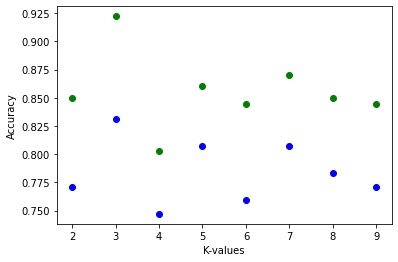

In [ ]:
plt.scatter(K, training, color ='g')
plt.scatter(K, test, color ='b')
plt.ylabel("Accuracy")
plt.xlabel("K-values")
plt.show()
